In [203]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

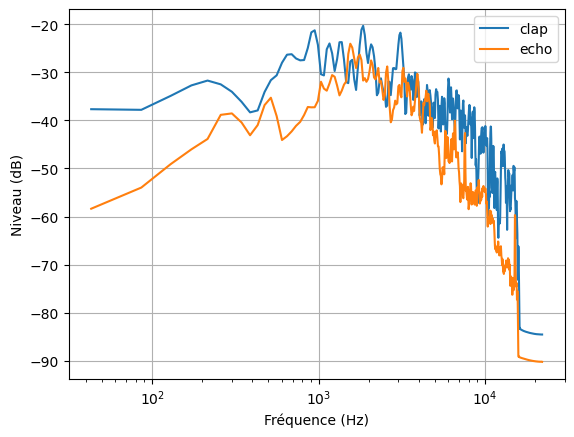

In [204]:
frequence_clap = []
niveau_clap = []

df_clap = pd.read_csv("spectre_clap.txt", sep="\t", header=[0])
df_clap = df_clap.stack().str.replace(',','.').unstack()

frequence_clap_str = list(df_clap["Fréquence (Hz)"])
niveau_clap_str    = list(df_clap["Niveau (dB)"]) 

for i in frequence_clap_str:
    frequence_clap.append(float(i))
for i in niveau_clap_str:
    niveau_clap.append(float(i))
    
    
############@    


frequence_echo = []
niveau_echo = []

df_echo = pd.read_csv("spectre_echo.txt", sep="\t", header=[0])
df_echo = df_echo.stack().str.replace(',','.').unstack()

frequence_echo_str = list(df_echo["Fréquence (Hz)"])
niveau_echo_str    = list(df_echo["Niveau (dB)"]) 

for i in frequence_echo_str:
    frequence_echo.append(float(i))
for i in niveau_echo_str:
    niveau_echo.append(float(i))
    
plt.plot(frequence_clap,niveau_clap,label='clap')
plt.plot(frequence_echo,niveau_echo,label='echo')
plt.xscale('log')
plt.grid()
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Niveau (dB)")
plt.legend()
plt.show()

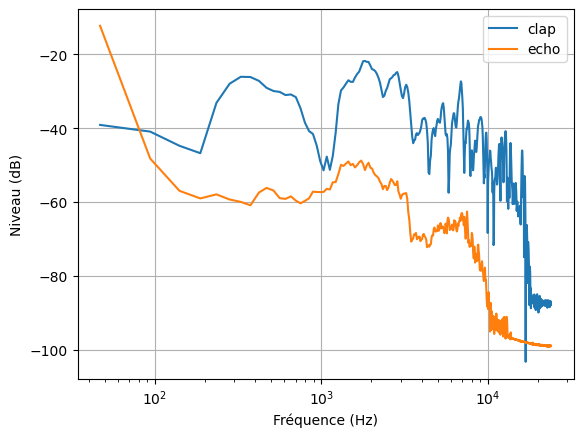

In [205]:
frequence_clap_2 = []
niveau_clap_2 = []

df_clap_2 = pd.read_csv("spectre_clap_2.txt", sep="\t", header=[0])
#df_clap_2 = df_clap_2.stack().str.replace(',','.').unstack()

frequence_clap_str_2 = list(df_clap_2["Fréquence (Hz)"])
niveau_clap_str_2    = list(df_clap_2["Niveau (dB)"]) 

for i in frequence_clap_str_2:
    frequence_clap_2.append(float(i))
for i in niveau_clap_str_2:
    niveau_clap_2.append(float(i))
    
    
############@    


frequence_echo_2 = []
niveau_echo_2 = []

df_echo_2 = pd.read_csv("spectre_echo_2.txt", sep="\t", header=[0])
#df_echo_2 = df_echo_2.stack().str.replace(',','.').unstack()

frequence_echo_str_2 = list(df_echo_2["Fréquence (Hz)"])
niveau_echo_str_2    = list(df_echo_2["Niveau (dB)"]) 

for i in frequence_echo_str_2:
    frequence_echo_2.append(float(i))
for i in niveau_echo_str_2:
    niveau_echo_2.append(float(i))
    
plt.plot(frequence_clap_2,niveau_clap_2,label='clap')
plt.plot(frequence_echo_2,niveau_echo_2,label='echo')
plt.xscale('log')
plt.grid()
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Niveau (dB)")
plt.legend()
plt.show()

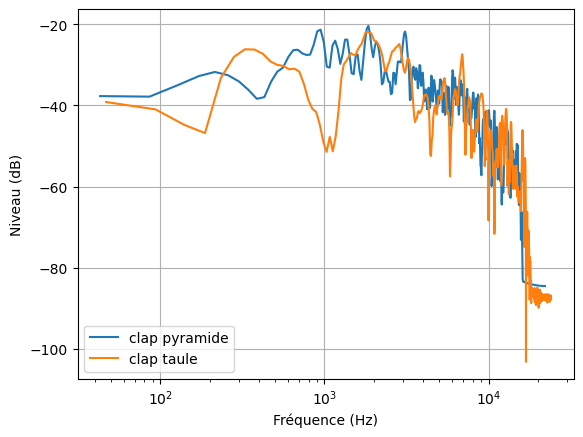

In [206]:

plt.plot(frequence_clap,niveau_clap,label='clap pyramide')
plt.plot(frequence_clap_2,niveau_clap_2,label='clap taule')
plt.xscale('log')
plt.grid()
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Niveau (dB)")
plt.legend()
plt.show()

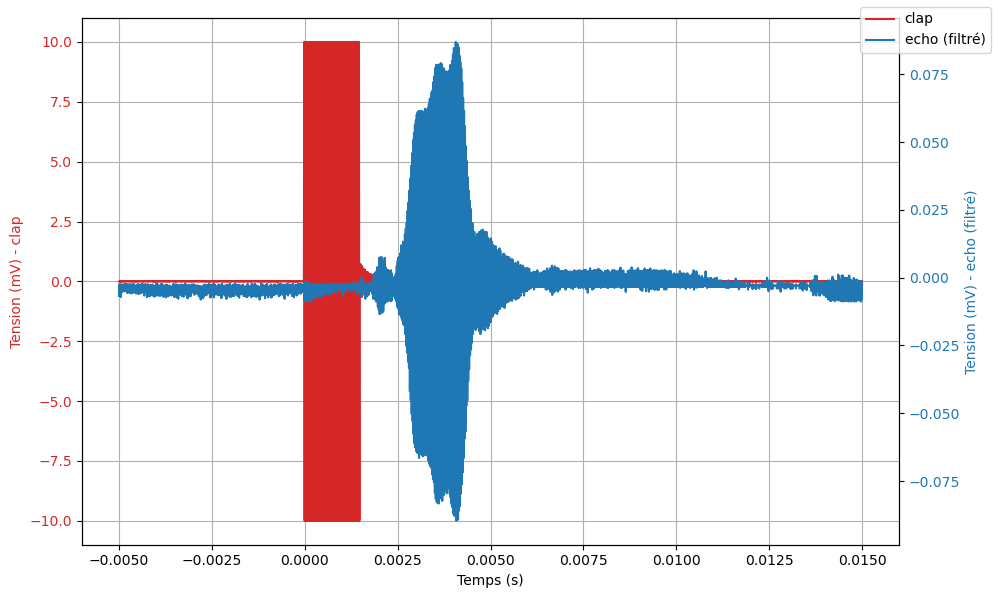

In [210]:
temps_expe  = []
entre_expe  = []
sortie_expe = []


df_expe = pd.read_csv("CAMILLE_CAMILLE_BASE.txt", sep="\t", header=[0])

temps_expe  = list(df_expe["Temps"])
entre_expe  = list(df_expe["EA1"])
sortie_expe = list(df_expe["EA2"])

    

window_size = 11  # Taille de la fenêtre du filtre
order = 2         # Ordre du polynôme du filtre
sortie_expe_filtree = savgol_filter(sortie_expe, window_size, order)


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Temps (s)')
ax1.set_ylabel('Tension (mV) - clap', color=color)
ax1.plot(temps_expe, entre_expe, color=color, label='clap')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Tension (mV) - echo (filtré)', color=color)
ax2.plot(temps_expe, sortie_expe_filtree, color=color, label='echo (filtré)')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper right')

plt.show()

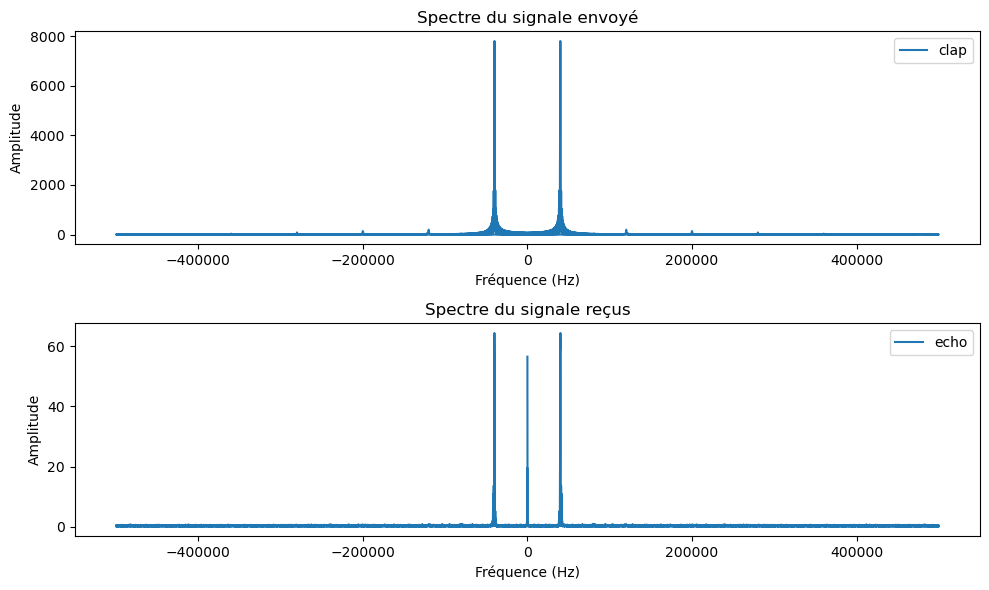

In [208]:
fft_entre = np.fft.fft(entre_expe)
fft_sortie = np.fft.fft(sortie_expe)

frequence = np.fft.fftfreq(len(temps_expe), temps_expe[1] - temps_expe[0])

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(frequence, np.abs(fft_entre), label='clap')
plt.title('Spectre du signale envoyé')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequence, np.abs(fft_sortie), label='echo')
plt.title('Spectre du signale reçus')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()